# Lab session 1 ---- Linear Regression

Student: Boudissa Selma                     
Date:09/03/18

## I. Introduction
In this exercise, we will implement linear regression with one and multiple variables, as well as gradient descent.

## II. Linear regression with one variable
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new food truck. The chain already has trucks in various cities and you have data for profits and populations from the cities.
You would like to use this data to help you select which city to expand to next. The file lab1data1.txt contains the dataset: the first column is the poplulation of a city and the second column is the profit of a food truck in that city. An negative value for profit indicates a loss.

### Solution Question 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt 


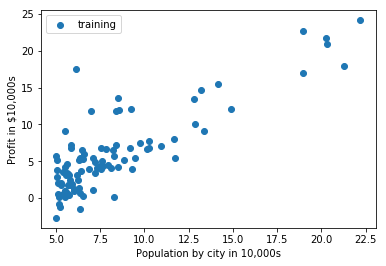

In [7]:
# load the data
data = np.loadtxt("data1.txt", delimiter=',')
X = np.atleast_2d(data[:, :-1])
y = data[:, -1]
print('There is {} samples and {} features'.format(X.shape[0],X.shape[1]))

#print the data

plt.figure()
plt.scatter(X, y, label='training')
plt.xlabel('Population by city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend()
plt.show()

### Solution Question 2

[ 0.71726101 -0.01357131]
[-3.89578088  1.19303364]


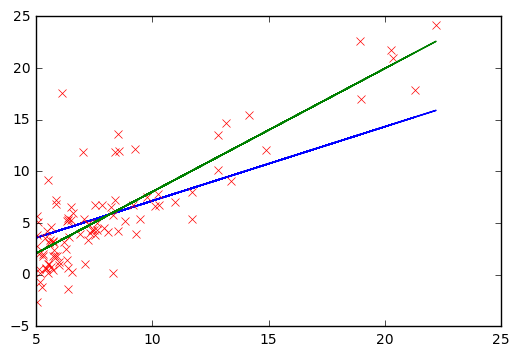

In [17]:
# Function Linear regression 
def linear_regression (x,y):
    n = len(x); #size of x
    
    A = sum(x*y)-sum(x)*sum(y);
    B = sum(x**(2))-((sum(x))**(2));
    
    w1=(n*A)/(n*B);
    w0=np.mean(y)-w1*np.mean(x);
    
    w = [w1,w0]

    return w

# check that the linear regression is working
wt = linear_regression(X, y)

w1, w0 = wt 
x = X 
yr = w0 + w1 * x


# Plotting 
plt.plot(x , np.mean(yr, axis=1))
plt.plot(x,y, 'rx')

intercept = np.ones((x.shape[0], 1))
Xstack = np.asmatrix(np.hstack((intercept, x)))
# Least square 
wt2,_,_,_ = np.linalg.lstsq(Xstack,y)

print(np.mean(wt, axis=1))
print(wt2)

yrtrue = wt2[1] * x + wt2[0]

#plotting
plt.plot(x,yrtrue, 'g')
plt.show()


# ---------------------------------------------------------------------------------------------------------------------
# OTHER METHOD
#def linear_regression (x,y):
#if intercept:
# X_ = np.asmatrix(X)
#else
#intercept_array = np.ones((X.shape[0], 1))
# add intercept
#  X_ = np.asmatyrix(np.hstack((intercept_array, X))
#Least squares
# w,_,_,_=np.linalg.lstsq(x_,y)
#return w
#plotting
#w = linear_regression(X,y)
#print('the parameters estimated are: {}'.format(w))

### Solution Question 3

In [18]:
# Making Predictations
test = np.array ([3.5, 7.0])
w = [ 1.19303364,-3.89578088 ]
def predict (wt2,y):
    y = np.vstack([y.flatten(), np.ones(len(y.flatten()))])
    predict = np.dot(wt2,y)
    return predict

prediction = predict (w,test)
print('The parameters estimated are: {}'.format(prediction*10000))


The parameters estimated are: [  2798.3686  44554.546 ]


## III. Linear regression with multiple variables
Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to collect information on recent houses sold and make a model of housing prices.
The file lab1data2.txt contains a training set of housing prices in a city. The first column is the size of the house (in square feet), the second column is the number of bedrooms and the third column is the price of the house.

### Solution Question 1

In [19]:
#Loading Data
data2 = np.loadtxt('data2.txt', delimiter=',')

# Function for linear regression with multiple variables
def linear_regression_mutiple(data):
    x = data[:,0:2]
    y = data[:,2]
    x = np.vstack((np.ones((1,x.shape[0])),x.T)).T
    w,_,_,_ = np.linalg.lstsq(x,y,rcond=0)
    return w

# check that the linear regression is working 
w = linear_regression_mutiple(data2)
# w should have three parameters now
assert w.size == 3
# plotting
print('There is {} samples and {} features'.format(X.shape[0], X.shape[1]))
print('The parameters estimated are: {}'.format(w))

There is 97 samples and 1 features
The parameters estimated are: [ 89597.9095428     139.21067402  -8738.01911233]


### Solution Question 2

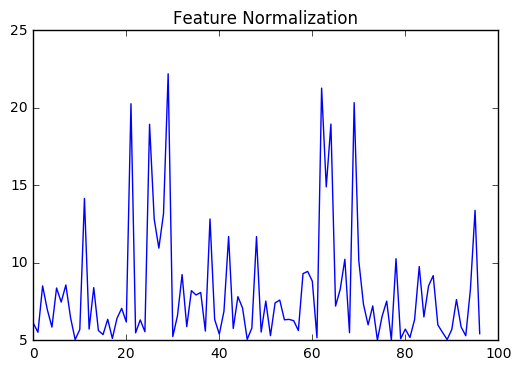

In [51]:
# Feature normalization

def featureNormalize(X):
    
    [Xn, mu, sigma] = featureNormalize(X)
    mu = mean(X)
    Xn = X - mu
    sigma = stp(Xn)
    Xn1 = Xn1/sigma1
    Xn2 = Xn2/sigma2
    
# Calculates mean and std dev for each feature
    for i in range (1,size(mu,2)):
        mu[1,i] = mean(X[:,i])
        sigma[1,i] = std(X[:,i])
        Xn[:,i] = (X[:,i]-mu(1,i))/sigma(1,i)
    return Xn
# Plotting 
#print('The parameters estimated are: {}'.format(X))
plt.figure()
plt.plot(X)
plt.title('Feature Normalization')
plt.show()

### Solution Question 3

In [ ]:
# Estimation after feature Normalization 



### Solution Question 4

In [ ]:
# Prediction of the price base on the previous estimation s

## IV. Gradient descent
We will now perform linear regression using gradient descent.

### Solution Question 1

In [123]:
def compute_cost(X, y, theta):
    '''
    Comput cost for linear regression
    '''
    #Number of training samples
    m = y.size

    predictions = X.dot(theta).flatten()

    sqErrors = (predictions - y) ** 2

    J = (1.0 / (2 * m)) * sqErrors.sum()
    return (J)


X = data[:, 0]
y = data[:, 1]

#Initialize theta parameters
theta = np.zeros(shape=(2, 1))
#Add a column of ones to X (interception data)
it = np.ones(shape=(y.size, 2))
#it[:, 1] = X
#compute and display initial cost
cost = compute_cost(it, y, theta)
print('The parameters estimated are: {}'.format(cost))

The parameters estimated are: 32.072733877455676


### Solution Question 2

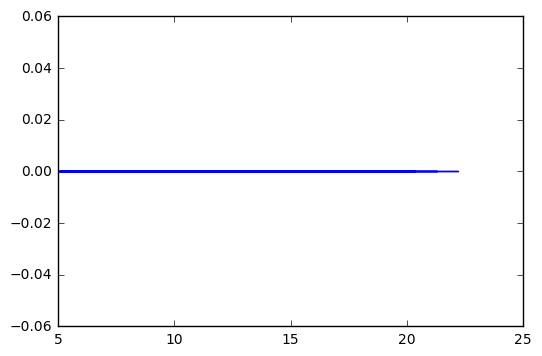

In [151]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = np.zeros(shape=(num_iters, 1))
    return (theta, J_history);

#for i in range(1,num_iters):
    predictions = X.dot(theta).flatten()
    errors_x1 = (predictions - y) * X[:, 0]
    errors_x2 = (predictions - y) * X[:, 1]

    theta[0][0] = theta[0][0] - alpha * (1.0 / m) * errors_x1.sum()
    theta[1][0] = theta[1][0] - alpha * (1.0 / m) * errors_x2.sum()

    J_history[i, 0] = compute_cost(X, y, theta)

#Load the dataset
data = np.loadtxt('data1.txt', delimiter=',')

#Plot the data
#plt.scatter(data[:, 0], data[:, 1], marker='o', c='b')

X = data[:, 0]
y = data[:, 1]


#number of training samples
m = y.size

#Add a column of ones to X (interception data)
it = np.ones(shape=(m, 2))
it[:, 1] = X

#Initialize theta parameters
theta = np.zeros(shape=(2, 1))

#Some gradient descent settings
iterations = 1500
alpha = 0.01



theta, J_history = gradient_descent(it, y, theta, alpha, iterations)


#Plot the results
result = it.dot(theta).flatten()
plt.plot(data[:, 0], result)
plt.show()


#Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)


#initialize J_vals to a matrix of 0's
J_vals = np.zeros(shape=(theta0_vals.size, theta1_vals.size))




### Solution Question 3